In [1]:
import QM as q
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

BIGGER_SIZE = 18
plt.rc('font', size=BIGGER_SIZE)
plt.rcParams['figure.figsize'] = [12,8]

In [2]:
def V(x, potential):
    ret = np.vectorize(potential)(x)
    return np.diag(ret)

def T(N, dx):
    ret = -2*np.diag(np.linspace(1,1,N), 0) + np.diag(np.linspace(1,1,N-1), 1) + np.diag(np.linspace(1,1,N-1), -1)
    ret = (-1/(2*dx**2))*ret
    return ret

def H(T, V):
    return q.operator(T + V)

# Double well potential

$$
V^0 = \frac{1}{2}m\omega^2x_0^2\left[\frac{x^2}{x^2_0} - 6\right]\frac{1}{24}
$$

With $x_0=\sqrt{\frac{\hbar}{m\omega}}$. In rescaled units ($\tilde{x}=x/x_0$, $\tilde{E}=E/\hbar\omega$ and $\tilde{V}(\tilde{x})=\frac{V(\tilde{x}x_0)}{\hbar\omega}$) it becomes (omitting the tilde)

$$
V^0(x) = \frac{1}{48}\left[x^2 - 6\right]^2
$$

## 1.1

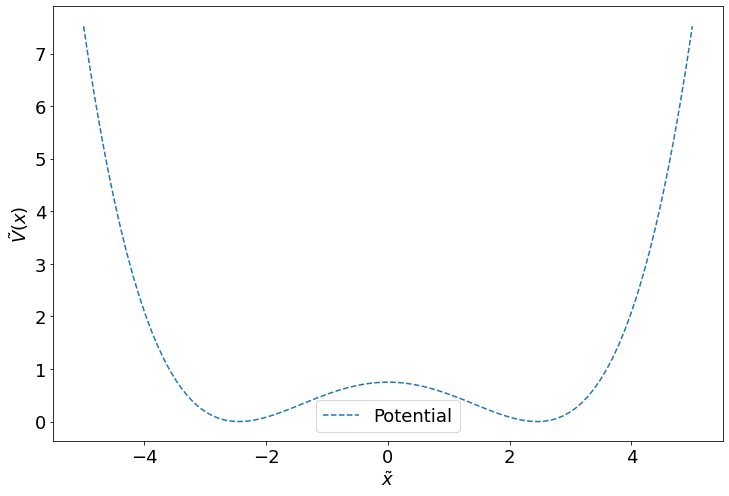

In [101]:
# Scale
L = 5
N = 100
xarr = np.linspace(-L, L, N)
dx = (2*L)/(N-1)

# Potential
double_well = lambda x:(1/48)*( (x**2 - 6)**2 )

# Plot potential
plt.plot(xarr, double_well(xarr), label='Potential', linestyle='dashed')


plt.xlabel('$\\tilde{x}$')
plt.ylabel('$\\tilde{V}(x)$')
plt.legend()
plt.savefig('double_well_potential.png', bbox_inches='tight')

## 1.2

Add perturbation

$$
V_A =
\left\{
\begin{array}{cc}
    - & \delta\ \ \ \text{for}\ \ \ x<0 \\
      & \delta\ \ \ \text{for}\ \ \ x>0
\end{array}
\right.
$$

With $V = V^0 + V_A$.


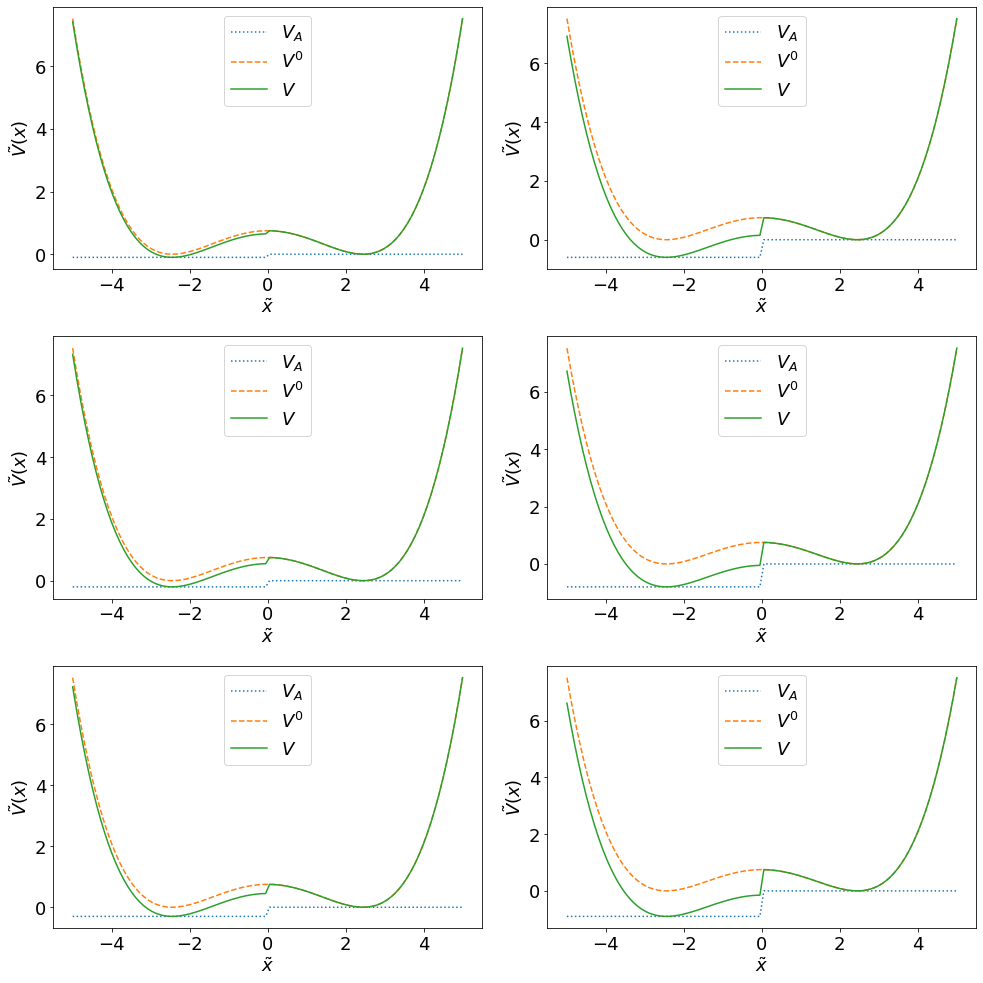

In [102]:
d = [0.1, 0.2, 0.3, 0.6, 0.8, 0.9]

fig, ax = plt.subplots(3,2, figsize=(14,14))

idx = 0

double_well = lambda x:(1/48)*( (x**2 - 6)**2 )

for i in range(2):
    for j in range(3):
        pert1 = lambda x: -d[idx]*(x<0) # Trick from https://stackoverflow.com/a/49847955
        ax[j,i].plot(xarr, pert1(xarr), label='$V_A$', linestyle='dotted')
        ax[j,i].plot(xarr, double_well(xarr), label='$V^0$', linestyle='dashed')
        ax[j,i].plot(xarr, pert1(xarr) + double_well(xarr), label='$V$', linestyle='solid')
        ax[j,i].set_xlabel('$\\tilde{x}$')
        ax[j,i].set_ylabel('$\\tilde{V}(x)$')
        ax[j,i].legend()
        idx+=1

plt.tight_layout()
plt.savefig('double_well_potential_asymmetric.png', bbox_inches='tight')


## 2.1

Calculate the eigenvalues and plot the eigenstates with no perturbation.

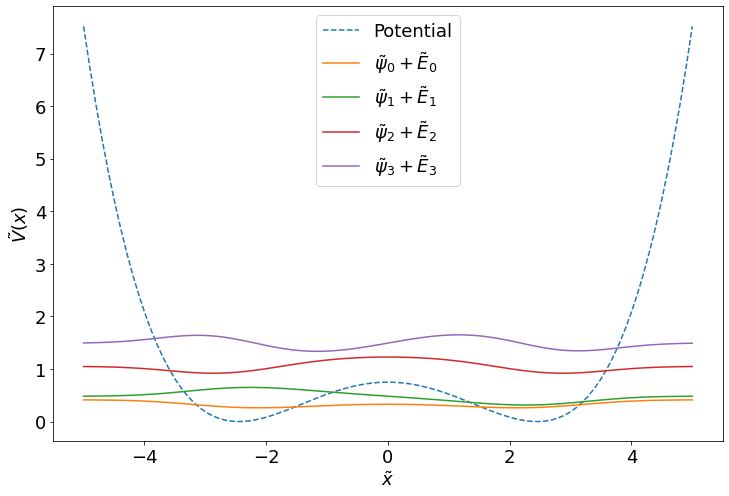

In [104]:
L = 5
N = 100
xarr = np.linspace(-L, L, N)
dx = (2*L)/(N-1)
pert1 = lambda x: 0*(x<0)
double_well = lambda x:(1/48)*( (x**2 - 6)**2 )

# Wavefunctions
H = q.operator(T(N,dx) + V(xarr, double_well) + V(xarr, pert1))
l, U = H.eig()
num_energies = l

plt.plot(xarr, double_well(xarr) + pert1(xarr), label='Potential', linestyle='dashed')

# Plot wave functions
for i in range(4):
    plt.plot(xarr, U[:,i]+l[i], label='$\\tilde{\psi}_'+str(i)+'' + '+ \\tilde{E}_' + str(i) + '$')

plt.xlabel('$\\tilde{x}$')
plt.ylabel('$\\tilde{V}(x)$')
plt.legend()
plt.savefig('double_well_potential_numerical_solution.png', bbox_inches='tight')


# 3

## 3.2

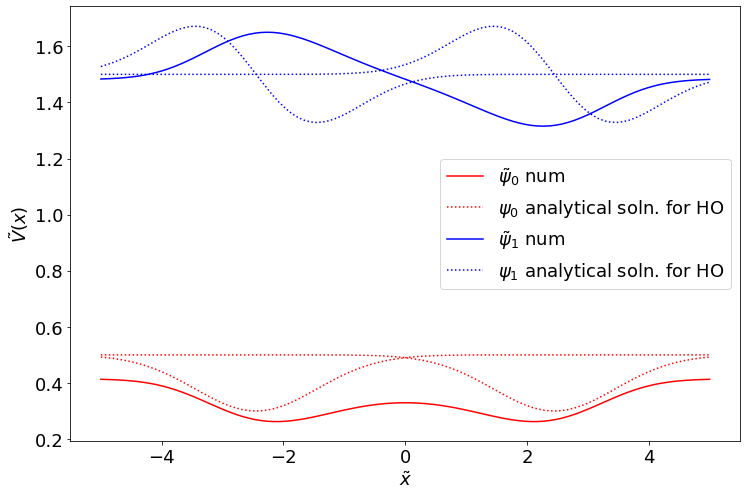

In [164]:
L = 5
N = 100
xarr = np.linspace(-L, L, N)
dx = (2*L)/(N-1)
pert1 = lambda x: 0*(x<0)
double_well = lambda x:(1/48)*( (x**2 - 6)**2 )
offset = np.sqrt(6)


def harmonic_oscillator_analytic_n(x, n, k=1):
    _herm = special.hermite(n, monic=False)
    return k * ( (1)/( np.sqrt((2**n)*(np.math.factorial(n)))) ) * (_herm(x)) * (np.exp( -(x**2)/2 ))

# Wavefunctions
H = q.operator(T(N,dx) + V(xarr, double_well) + V(xarr, pert1))
l, U = H.eig()
num_energies = l

#plt.plot(xarr, double_well(xarr) + pert1(xarr), label='Potential', linestyle='dashed')

# Plot wave functions
#for i in range(2):
#    plt.plot(xarr, U[:,i]+l[i], label='$\\tilde{\psi}_'+str(i)+'' + '+ \\tilde{E}_' + str(i) + '$')


plt.plot(xarr, U[:,0]+l[0], label='$\\tilde{\psi}_0$ num', color = 'red')
plt.plot(xarr, harmonic_oscillator_analytic_n(xarr + offset, 0, -0.2) + (0+0.5), label = '$\psi_0$ analytical soln. for HO', color = 'red', linestyle = 'dotted')
plt.plot(xarr, harmonic_oscillator_analytic_n(xarr - offset, 0, -0.2) + (0+0.5), color = 'red', linestyle = 'dotted')

plt.plot(xarr, U[:,1]+l[1]+1, label='$\\tilde{\psi}_1$ num', color = 'blue')
plt.plot(xarr, harmonic_oscillator_analytic_n(xarr + offset, 1, -0.2) + (1+0.5), label = '$\psi_1$ analytical soln. for HO', color = 'blue', linestyle = 'dotted')
plt.plot(xarr, harmonic_oscillator_analytic_n(xarr - offset, 1, -0.2) + (1+0.5), color = 'blue', linestyle = 'dotted')


plt.xlabel('$\\tilde{x}$')
plt.ylabel('$\\tilde{V}(x)$')
plt.legend()

plt.savefig('3.2.png', bbox_inches='tight')



# 4

## 4.2

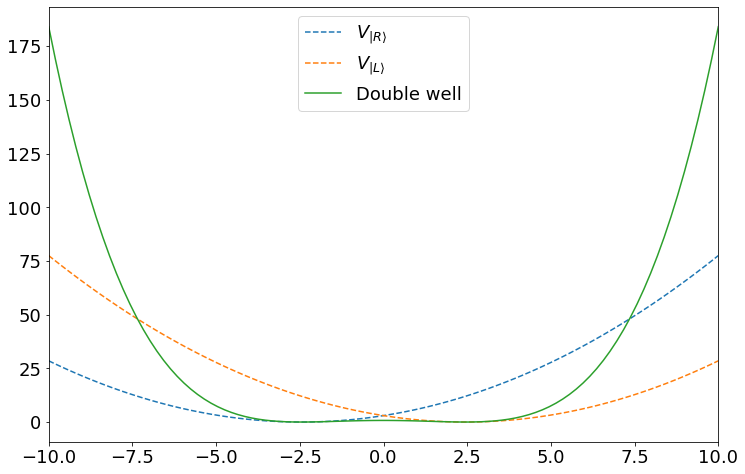

In [6]:
L = 10
N = 100
xarr = np.linspace(-L, L, N)
dx = (2*L)/(N-1)
offset = np.sqrt(6)

sho_L = lambda x:(1/2)*((x-offset)**2)
H_sho_L = q.operator(T(N,dx) + V(xarr, sho_L))
l_L, U_L = H_sho_L.eig()

sho_R = lambda x:(1/2)*((x+offset)**2)
H_sho_R = q.operator(T(N,dx) + V(xarr, sho_R))
l_R, U_R = H_sho_R.eig()

double_well = lambda x:(1/48)*( (x**2 - 6)**2 )


plt.plot(xarr, sho_R(xarr), label=r'$V_{| R \rangle}$', linestyle='dashed')
plt.plot(xarr, sho_L(xarr), label=r'$V_{| L \rangle}$', linestyle='dashed')
plt.plot(xarr, double_well(xarr), label='Double well', linestyle='solid')

#plt.axis('square')
plt.xlim(-L,L)
#plt.ylim(0,L)

plt.legend()

3.751870214908362


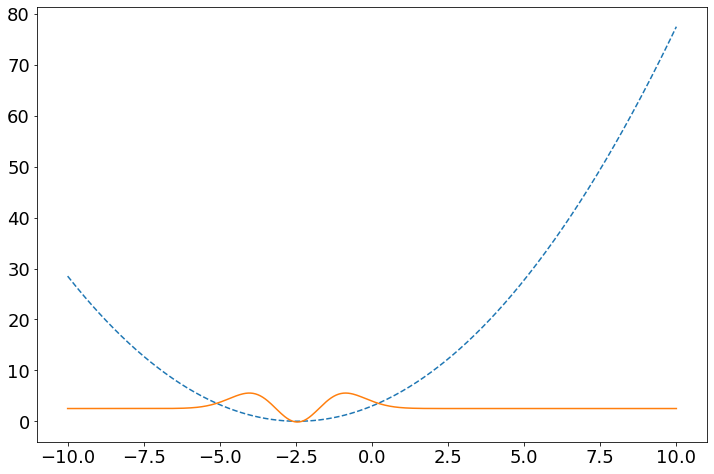

In [163]:
L = 10
N = 500
xarr = np.linspace(-L, L, N)
dx = (2*L)/(N-1)
offset = np.sqrt(6)


sho_R = lambda x:(1/2)*((x+offset)**2)


def harmonic_oscillator_analytic_n(x, n, k=1):
    _herm = special.hermite(n, monic=False)
    return k * ( (1)/( np.sqrt((2**n)*(np.math.factorial(n)))) ) * (_herm(x)) * (np.exp( -(x**2)/2 ))


herm = special.hermite(5, monic=False)


k = np.sqrt( 1 / (np.sqrt(np.pi) * dx) )

n = 2
y = harmonic_oscillator_analytic_n(xarr + offset, n, k)


plt.plot(xarr, sho_R(xarr), label=r'$V_{| R \rangle}$', linestyle='dashed')


plt.plot(xarr,y + (n+0.5))


## 4.3

Extract $E_0$ and $t$ from numerical solution.

In [105]:
num_energies[:2]
E_0 = (num_energies[0] + num_energies[1])/2
t = (num_energies[1] - num_energies[0])/2
print(E_0)
print(t)
print(num_energies[:2])
print(E_0 - t)
print(E_0 + t)

0.4481507020516865
0.03450847750076669
[0.41364222 0.48265918]
0.4136422245509198
0.4826591795524532


In [8]:
np.math.factorial(3)

6

In [9]:
herm(1)

-8.000000000000025

# 8

## 8.1

C:\Users\Bjart\AppData\Local\Temp/ipykernel_12364/2294963806.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return E_0 - d - ((t**2)/(2*d))
C:\Users\Bjart\AppData\Local\Temp/ipykernel_12364/2294963806.py:5: RuntimeWarning: divide by zero encountered in true_divide
  return E_0 + d + ((t**2)/(2*d))


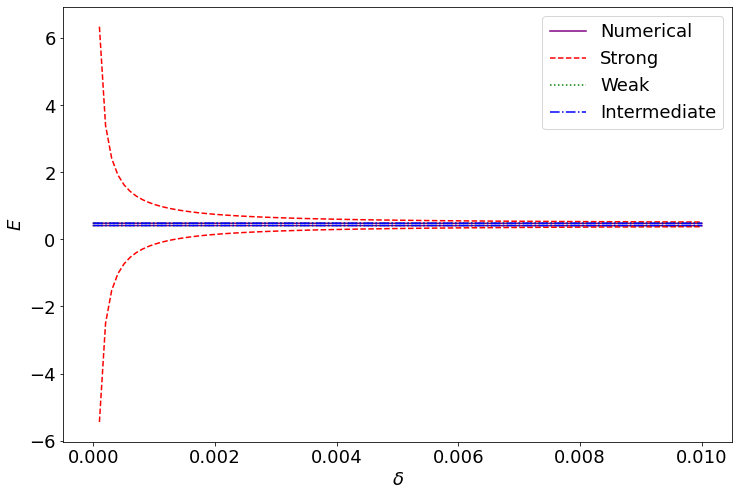

In [120]:
def strong_E_L(d, E_0, t):
    return E_0 - d - ((t**2)/(2*d))

def strong_E_R(d, E_0, t):
    return E_0 + d + ((t**2)/(2*d))

def weak_E_minus(d, E_0, t):
    return E_0 + t + ((d**2)/(2*t))

def weak_E_plus(d, E_0, t):
    return E_0 - t - ((d**2)/(2*t))

def intermediate_E_minus(d, E_0, t):
    return E_0 - np.sqrt(t**2 - d**2)

def intermediate_E_plus(d, E_0, t):
    return E_0 + np.sqrt(t**2 - d**2)


L = 5
N = 100
xarr = np.linspace(-L, L, N)
dx = (2*L)/(N-1)
double_well = lambda x:(1/48)*( (x**2 - 6)**2 )


res = 100
d = np.linspace(0,0.01,res)
num_E_0 = []
num_E_1 = []

for i,v in enumerate(d):
    # Numerical values
    pert1 = lambda x: -d[i]*(x<0)
    H = q.operator(T(N,dx) + V(xarr, double_well) + V(xarr, pert1))
    l, U = H.eig()
    num_E_0.append(l[0])
    num_E_1.append(l[1])

plt.plot(d, num_E_0, color = 'purple', label='Numerical', linestyle='solid')
plt.plot(d, num_E_1, color = 'purple', linestyle='solid')

plt.plot(d, strong_E_L(d, E_0, t), color = 'red', label='Strong', linestyle='dashed')
plt.plot(d, strong_E_R(d, E_0, t), color = 'red', linestyle='dashed')

plt.plot(d, weak_E_minus(d, E_0, t), color = 'green', label='Weak', linestyle='dotted')
plt.plot(d, weak_E_plus(d, E_0, t), color = 'green', linestyle='dotted')

plt.plot(d, intermediate_E_minus(d, E_0, t), color = 'blue', label='Intermediate', linestyle='dashdot')
plt.plot(d, intermediate_E_plus(d, E_0, t), color = 'blue', linestyle='dashdot')

plt.xlabel('$\delta$')
plt.ylabel('$E$')
plt.legend()
plt.savefig('all.png', bbox_inches='tight')


C:\Users\Bjart\AppData\Local\Temp/ipykernel_12364/2294963806.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return E_0 - d - ((t**2)/(2*d))
C:\Users\Bjart\AppData\Local\Temp/ipykernel_12364/2294963806.py:5: RuntimeWarning: divide by zero encountered in true_divide
  return E_0 + d + ((t**2)/(2*d))


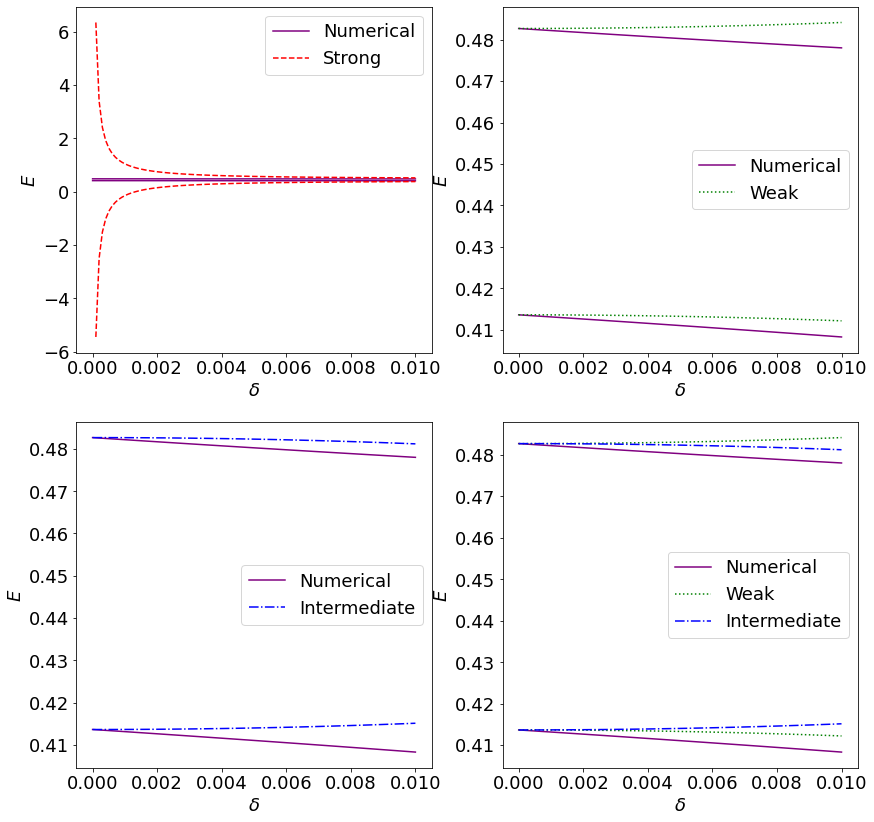

In [130]:
fig, ax = plt.subplots(2,2, figsize=(14,14))

ax[0,0].plot(d, num_E_0, color = 'purple', label='Numerical', linestyle='solid')
ax[0,0].plot(d, num_E_1, color = 'purple', linestyle='solid')

ax[0,0].plot(d, strong_E_L(d, E_0, t), color = 'red', label='Strong', linestyle='dashed')
ax[0,0].plot(d, strong_E_R(d, E_0, t), color = 'red', linestyle='dashed')

ax[0,0].set_xlabel('$\delta$')
ax[0,0].set_ylabel('$E$')
ax[0,0].legend()


ax[0,1].plot(d, num_E_0, color = 'purple', label='Numerical', linestyle='solid')
ax[0,1].plot(d, num_E_1, color = 'purple', linestyle='solid')

ax[0,1].plot(d, weak_E_minus(d, E_0, t), color = 'green', label='Weak', linestyle='dotted')
ax[0,1].plot(d, weak_E_plus(d, E_0, t), color = 'green', linestyle='dotted')

ax[0,1].set_xlabel('$\delta$')
ax[0,1].set_ylabel('$E$')
ax[0,1].legend()


ax[1,0].plot(d, num_E_0, color = 'purple', label='Numerical', linestyle='solid')
ax[1,0].plot(d, num_E_1, color = 'purple', linestyle='solid')

ax[1,0].plot(d, intermediate_E_minus(d, E_0, t), color = 'blue', label='Intermediate', linestyle='dashdot')
ax[1,0].plot(d, intermediate_E_plus(d, E_0, t), color = 'blue', linestyle='dashdot')

ax[1,0].set_xlabel('$\delta$')
ax[1,0].set_ylabel('$E$')
ax[1,0].legend()


ax[1,1].plot(d, num_E_0, color = 'purple', label='Numerical', linestyle='solid')
ax[1,1].plot(d, num_E_1, color = 'purple', linestyle='solid')

ax[1,1].plot(d, weak_E_minus(d, E_0, t), color = 'green', label='Weak', linestyle='dotted')
ax[1,1].plot(d, weak_E_plus(d, E_0, t), color = 'green', linestyle='dotted')

ax[1,1].plot(d, intermediate_E_minus(d, E_0, t), color = 'blue', label='Intermediate', linestyle='dashdot')
ax[1,1].plot(d, intermediate_E_plus(d, E_0, t), color = 'blue', linestyle='dashdot')

ax[1,1].set_xlabel('$\delta$')
ax[1,1].set_ylabel('$E$')
ax[1,1].legend()

plt.savefig('separate.png', bbox_inches='tight')

## 8.2

C:\Users\Bjart\AppData\Local\Temp/ipykernel_12364/2294963806.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return E_0 - d - ((t**2)/(2*d))
C:\Users\Bjart\AppData\Local\Temp/ipykernel_12364/2294963806.py:5: RuntimeWarning: divide by zero encountered in true_divide
  return E_0 + d + ((t**2)/(2*d))


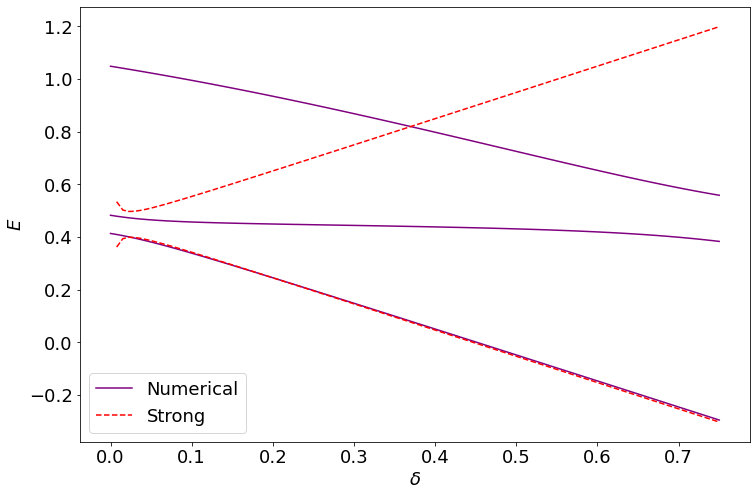

In [132]:
L = 5
N = 100
xarr = np.linspace(-L, L, N)
dx = (2*L)/(N-1)
double_well = lambda x:(1/48)*( (x**2 - 6)**2 )


res = 100
d = np.linspace(0,0.75,res)
num_E_0 = []
num_E_1 = []
num_E_2 = []

for i,v in enumerate(d):
    # Numerical values
    pert1 = lambda x: -d[i]*(x<0)
    H = q.operator(T(N,dx) + V(xarr, double_well) + V(xarr, pert1))
    l, U = H.eig()
    num_E_0.append(l[0])
    num_E_1.append(l[1])
    num_E_2.append(l[2])

plt.plot(d, num_E_0, color = 'purple', label='Numerical', linestyle='solid')
plt.plot(d, num_E_1, color = 'purple', linestyle='solid')
plt.plot(d, num_E_2, color = 'purple', linestyle='solid')

plt.plot(d, strong_E_L(d, E_0, t), color = 'red', label='Strong', linestyle='dashed')
plt.plot(d, strong_E_R(d, E_0, t), color = 'red', linestyle='dashed')

plt.xlabel('$\delta$')
plt.ylabel('$E$')
plt.legend()
plt.savefig('8.3.png', bbox_inches='tight')